<a href="https://colab.research.google.com/github/Takaros96/Customer-Segmentation-With-K-means-clustering/blob/main/Coursera_guided_projects_Introduction_to_Customer_Segmentation_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA#The number of principal components is the number of dimensions that you’d like to reduce the feature space to. principal components are directions of maximum variance in the dataset.
                                     #The explained_variance_ratio_ attribute captures the ratio of the total variance each principal component captures. Sowe can sum up the ratios to get the total variance in the chosen number of components.
from sklearn.decomposition import KernelPCA#The Principal Component Analysis (PCA) is the method that the Kernel PCA generalizes on nonlinear data. Being a dimensionality reduction technique.
                                           #PCA takes high dimensional data and finds new coordinates, principal components, that are orthogonal to each other and explains most of the variance in the data. The problem with this method is that it’s linear.
                                           #Therefore, the PCA can only guarantee dimensionality reduction quality only if the data is linear. For nonlinear data, it fails to capture the key features of the data.
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer
import plotly.graph_objects as go

In [ ]:
df=pd.read_csv('/content/Wholesale customers data.csv')

In [ ]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
df=df.rename(columns={'Delicassen':'Delicatessen'})
df['Channel']=df['Channel'].map({1:'HoReCa',2:'Retail'})
df['Region']=df['Region'].map({1:'Lisbon',2:'Porto',3:'Other'})

In [ ]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReCa,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,HoReCa,Other,29703,12051,16027,13135,182,2204
436,HoReCa,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,HoReCa,Other,10290,1981,2232,1038,168,2125


In [ ]:
df.columns.tolist()

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [ ]:
features=[
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen']
df[features].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df=pd.read_csv('/content/data_processed.csv',index_col=0)#reads the first column as the index column

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReCa,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [ ]:
df.Region.value_counts()#counts number of unique values

Other     316
Lisbon     77
Porto      47
Name: Region, dtype: int64

In [ ]:
df.columns.tolist()

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [ ]:
features=[
 'Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

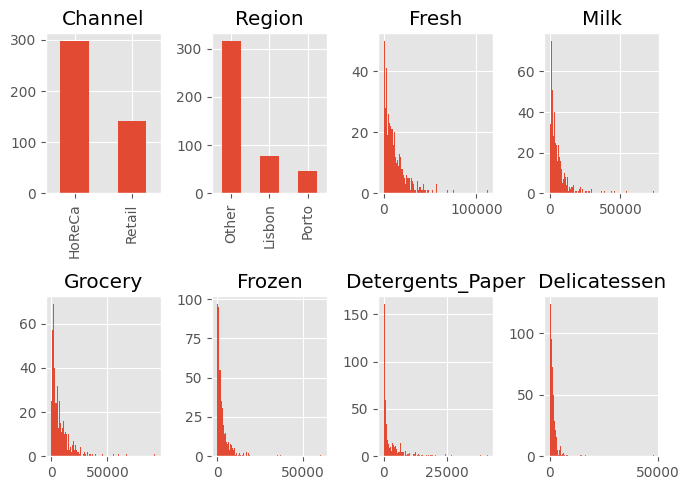

In [ ]:
fig,axes=plt.subplots(2,4,figsize=(7,5))

for feature,ax in zip(features,axes.ravel()):#zip hepls us iterate over two values at the same time
  if(feature=='Channel')|(feature=='Region'):
    df[feature].value_counts().plot.bar(ax=ax)
  else:
    ax.hist(df[feature],bins=100)
  ax.set_title(feature)
plt.tight_layout()#to prevent overlaping

<Figure size 700x700 with 0 Axes>

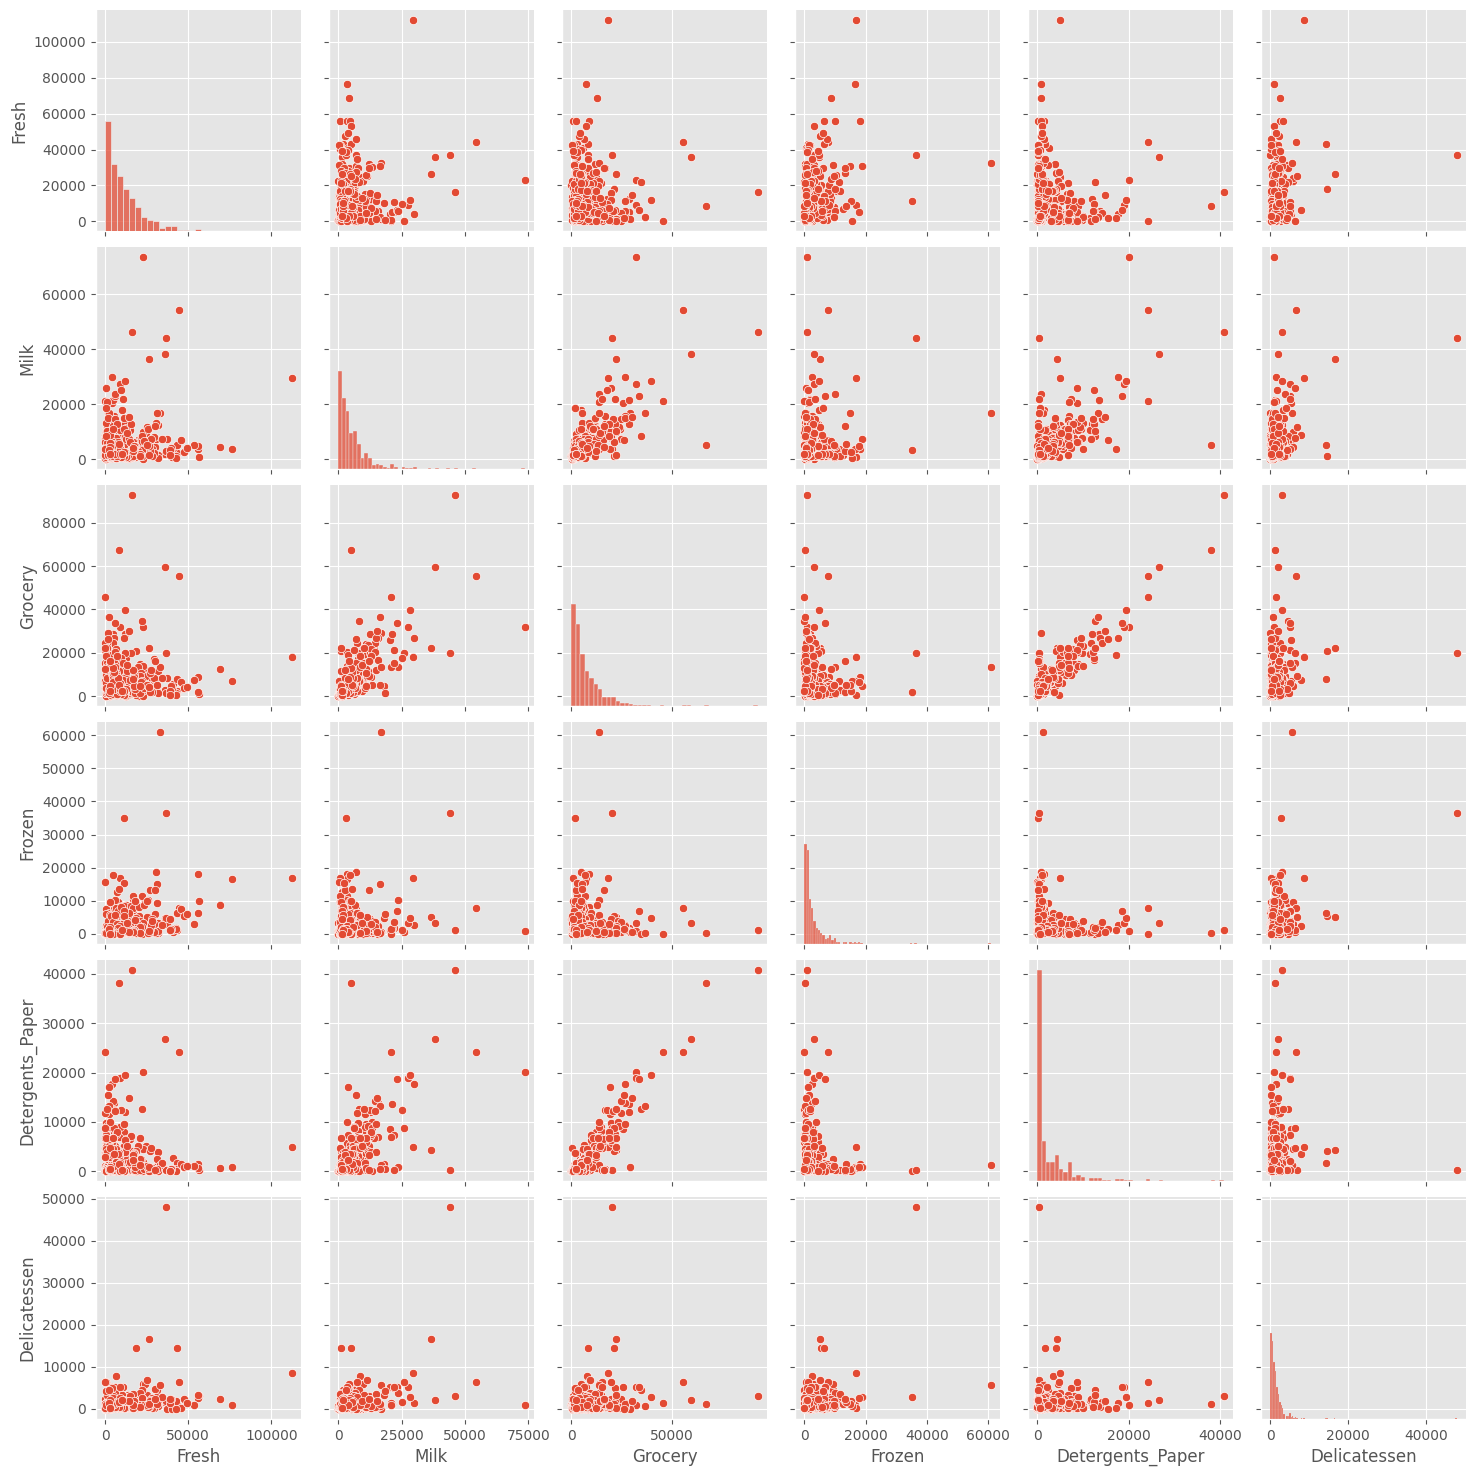

In [ ]:
plt.figure(figsize=(7,7))
sns.pairplot(df,vars=features[2:])


In [ ]:
#pca tries to find a specific dimension where the variance is maximized
#if a specific feature has a high variance,it will bias us towards that feature
#it will also affect pca

In [ ]:
features=[
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen']

In [ ]:
#we take a column and normalize it,thus making it have zero mean and 1 std
#so pca won't bias towards a specific feature

In [ ]:
df=pd.read_csv('/content/data_processed.csv',index_col=0)

In [ ]:
data=df[features].to_numpy()#numpy array

In [ ]:
data.shape

(440, 6)

In [ ]:
scaler=StandardScaler()
data=scaler.fit_transform(data)
data[:, 0].std()

1.0

In [ ]:
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [ ]:
pca=PCA(n_components=2)
res_pca=pca.fit_transform(data)

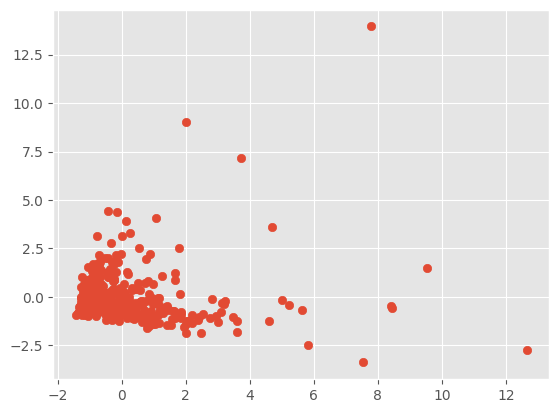

In [ ]:
plt.scatter(res_pca[:,0],res_pca[:,1])

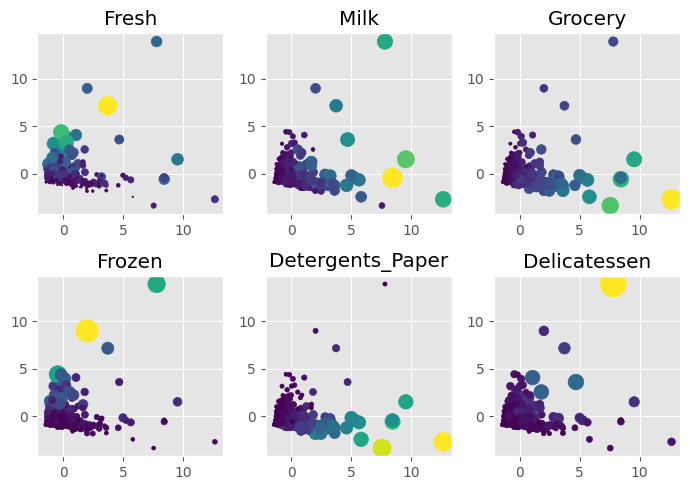

In [ ]:
fig,axes=plt.subplots(2,3,figsize=(7,5))

for feature,ax in zip(features,axes.ravel()):#ravel helps us iterate through a 2d array
  cmap='viridis'
  sizes=20+20*data[:,features.index(feature)]
  cols=df[feature]
  ax.scatter(res_pca[:,0],res_pca[:,1],s=sizes,c=cols,cmap=cmap)
  ax.set_title(feature)
plt.tight_layout()

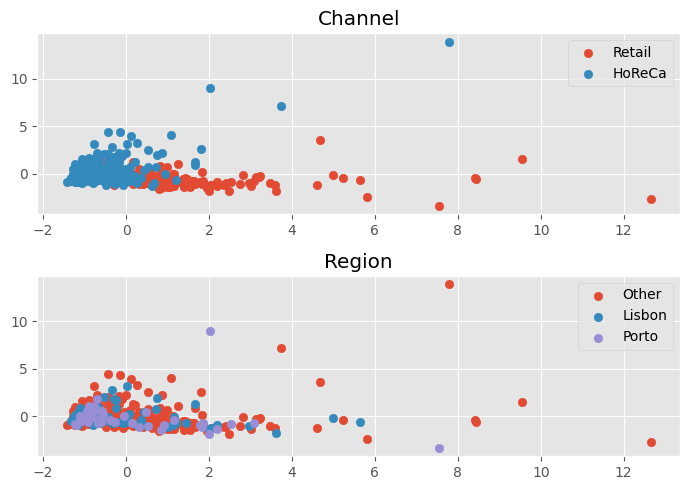

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(7,5))

for feature,ax in zip(['Channel','Region'],axes.ravel()):
  cmap='Pastel'
  size=20
  for unique_val in df[feature].unique():
    ax.scatter(res_pca[df[feature]==unique_val,0],
               res_pca[df[feature]==unique_val,1],
               label=unique_val)

    ax.set_title(feature)
    ax.legend()
plt.tight_layout()

In [ ]:
features=[
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen']

In [ ]:
df=pd.read_csv('/content/data_processed.csv',index_col=0)

In [ ]:
data=np.load('training_data.npy')

In [ ]:
kpca=KernelPCA(n_components=2,kernel='poly',degree=2)
res_kpca_poly=kpca.fit_transform(data)

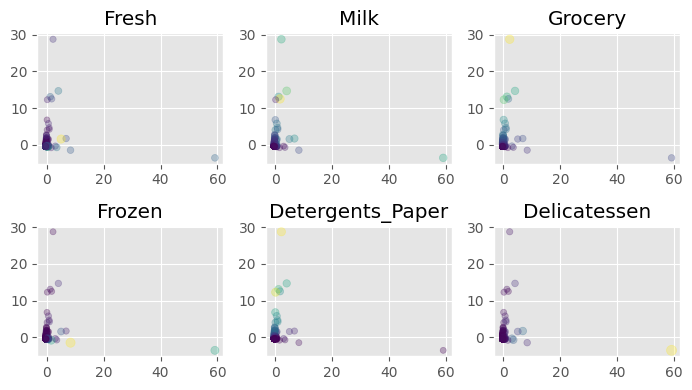

In [ ]:
fig,axes=plt.subplots(2,3,figsize=(7,4))

for feature,ax in zip(features,axes.ravel()):#ravel helps us iterate through a 2d array
  cmap='viridis'
  sizes=20+2*data[:,features.index(feature)]
  cols=df[feature]
  ax.scatter(res_kpca_poly[:,0],res_kpca_poly[:,1],
             s=sizes,alpha=0.3,c=df[feature],cmap=cmap)
  ax.set_title(feature)
plt.tight_layout()

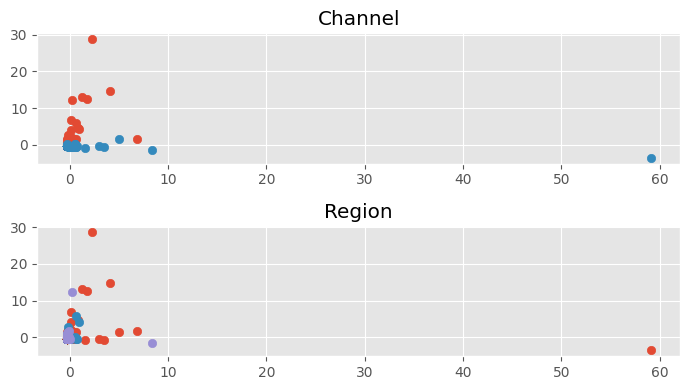

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(7,4))

for feature,ax in zip(['Channel','Region'],axes.ravel()):
  cols='Pastel'
  size=20
  for unique_val in df[feature].unique():
    ax.scatter(res_kpca_poly[df[feature]==unique_val,0],
               res_kpca_poly[df[feature]==unique_val,1],
               label=unique_val)

    ax.set_title(feature)

plt.tight_layout()

In [ ]:
kpca=KernelPCA(n_components=2,kernel='rbf')
res_kpca_rbf=kpca.fit_transform(data)

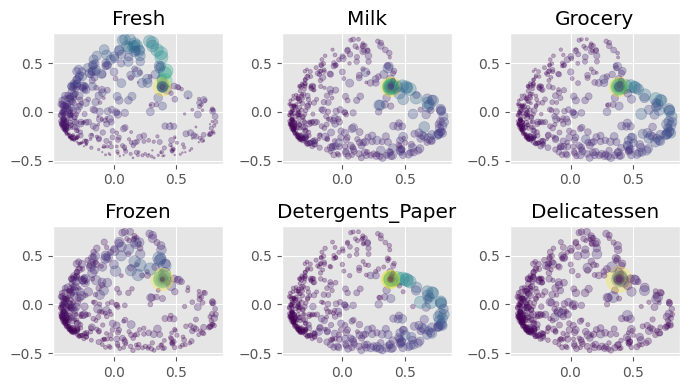

In [ ]:
fig,axes=plt.subplots(2,3,figsize=(7,4))

for feature,ax in zip(features,axes.ravel()):#ravel helps us iterate through a 2d array
  cmap='viridis'
  sizes=20+20*data[:,features.index(feature)]
  ax.scatter(res_kpca_rbf[:,0],res_kpca_rbf[:,1],
             s=sizes,alpha=0.3,c=df[feature],cmap=cmap)
  ax.set_title(feature)
plt.tight_layout()

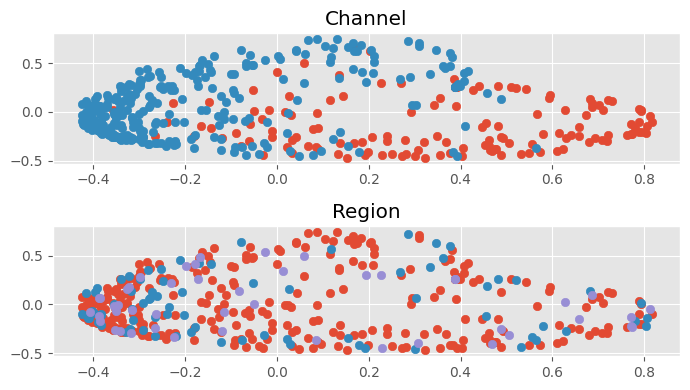

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(7,4))

for feature,ax in zip(['Channel','Region'],axes.ravel()):
  cols='Pastel'
  size=20
  for unique_val in df[feature].unique():
    ax.scatter(res_kpca_rbf[df[feature]==unique_val,0],
               res_kpca_rbf[df[feature]==unique_val,1],
               label=unique_val)

    ax.set_title(feature)

plt.tight_layout()

In [ ]:
df['x_kpca_poly']=res_kpca_poly[:,0]
df['y_kpca_poly']=res_kpca_poly[:,1]

df['x_kpca_rbf']=res_kpca_rbf[:,0]
df['y_kpca_rbf']=res_kpca_rbf[:,1]


In [ ]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca_poly,y_kpca_poly,x_kpca_rbf,y_kpca_rbf
0,Retail,Other,12669,9656,7561,214,2674,1338,-0.298146,-0.307672,0.078374,-0.173115
1,Retail,Other,7057,9810,9568,1762,3293,1776,-0.272613,-0.248762,0.185813,-0.307415
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.557870,-0.356102,0.341702,0.075048
3,HoReCa,Other,13265,1196,4221,6404,507,1788,-0.263419,-0.454023,-0.253304,0.250352
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.126922,-0.432733,0.136617,0.375279
...,...,...,...,...,...,...,...,...,...,...,...,...
435,HoReCa,Other,29703,12051,16027,13135,182,2204,0.319105,-0.223157,0.376162,0.466779
436,HoReCa,Other,39228,1431,764,4510,93,2346,-0.199863,-0.452928,0.130231,0.745111
437,Retail,Other,14531,15488,30243,437,14841,1867,-0.077851,2.473393,0.720747,0.122400
438,HoReCa,Other,10290,1981,2232,1038,168,2125,-0.312088,-0.434577,-0.352004,-0.033909


In [ ]:
#we use kpca to reduce dimensionality about data set using different kind of kernels

In [ ]:
df=pd.read_csv('/content/data_with_latent.csv',index_col=0)

In [ ]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca_rbf,y_kpca_rbf,x_kpca_poly,y_kpca_poly,x_kpca_cos,y_kpca_cos
0,Retail,Other,12669,9656,7561,214,2674,1338,0.052874,-0.095702,0.078374,-0.173115,0.504789,0.009622
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.129646,-0.160458,0.185813,-0.307415,0.889941,-0.262833
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.210205,0.048446,0.341702,0.075048,0.473994,0.235687
3,HoReCa,Other,13265,1196,4221,6404,507,1788,-0.216243,0.105165,-0.253304,0.250352,-0.618611,0.370131
4,Retail,Other,22615,5410,7198,3915,1777,5185,-0.011687,0.265432,0.136617,0.375279,0.068900,0.861829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,HoReCa,Other,29703,12051,16027,13135,182,2204,0.160965,0.533841,0.376162,0.466779,0.251200,0.970344
436,HoReCa,Other,39228,1431,764,4510,93,2346,-0.180932,0.570433,0.130231,0.745111,-0.400170,0.931981
437,Retail,Other,14531,15488,30243,437,14841,1867,0.830631,0.104410,0.720747,0.122400,1.135432,0.306253
438,HoReCa,Other,10290,1981,2232,1038,168,2125,-0.221278,-0.066883,-0.352004,-0.033909,-0.594661,-0.179908


In [ ]:
data=np.load('/content/training_data.npy')

In [ ]:
features=[
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen']

In [ ]:
res_kpca=df[['x_kpca_cos','y_kpca_cos']].to_numpy()

In [ ]:
clusterer=KMeans(n_clusters=5)
clusters=clusterer.fit_predict(res_kpca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters[:5]

array([2, 3, 3, 4, 0], dtype=int32)

In [ ]:
markers=list('*hH+xXDd|.,ov^<>12348spP')

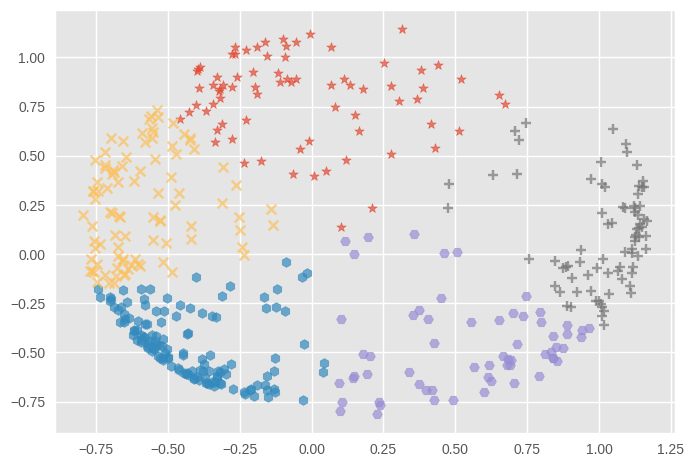

In [ ]:
for cluster in np.unique(clusters):
  cluster_data=res_kpca[clusters==cluster]
  plt.scatter(cluster_data[:,0],cluster_data[:,1],
              alpha=0.7,
              marker=markers[cluster])

<ipython-input-137-8d3b0ab26222>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(cluster_data[:,0],


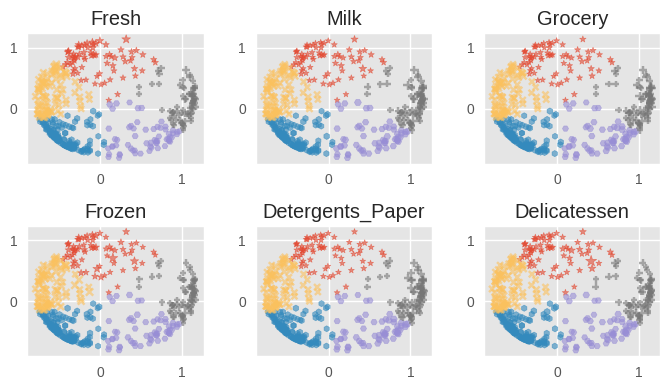

In [ ]:
fig,axes=plt.subplots(2,3,figsize=(7,4))

for feature,ax in zip(features,axes.ravel()):#ravel helps us iterate through a 2d array
  cmap='viridis'
  for cluster in np.unique(clusters):
      cluster_data=res_kpca[clusters==cluster]
      sizes=20+3*data[:,features.index(feature)][clusters==cluster]
      ax.scatter(cluster_data[:,0],
                 cluster_data[:,1],
                 s=sizes,
                 alpha=0.6,
                 cmap=cmap,
                 marker=markers[cluster])
  ax.set_title(feature)
plt.tight_layout()

In [ ]:
df['cluster_kpca_cos']=clusters
df.to_csv('data_with_clusters.csv')

In [ ]:
#elbow method to find the optimal k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

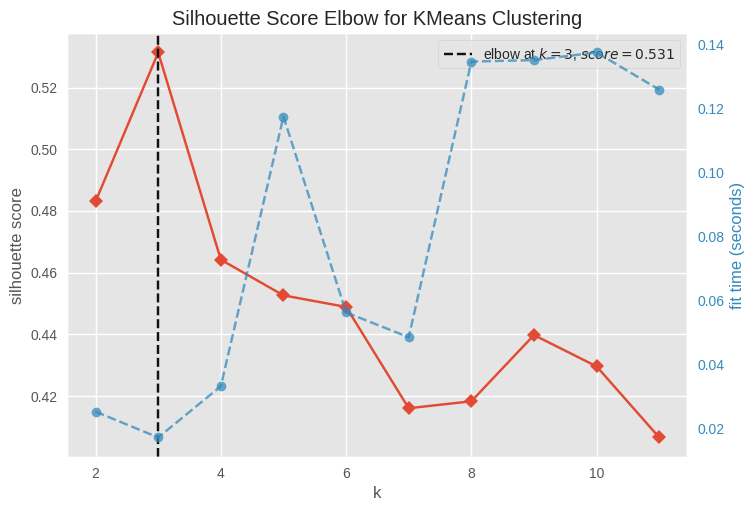

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from yellowbrick.cluster.elbow import KElbowVisualizer
clusterer=KMeans()
visualizer=KElbowVisualizer(clusterer,k=(2,12),metric='silhouette')

visualizer.fit(res_kpca)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

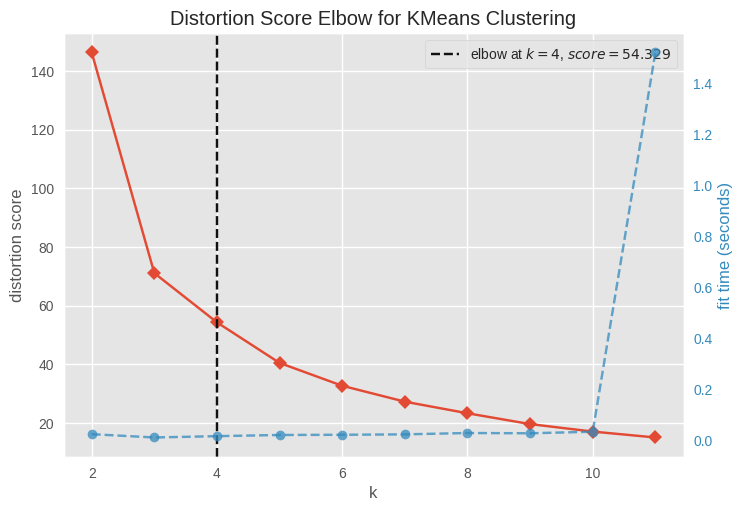

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster.elbow import KElbowVisualizer
clusterer=KMeans()
visualizer=KElbowVisualizer(clusterer,k=(2,12),metric='distortion')

visualizer.fit(res_kpca)
visualizer.show()

In [ ]:
features=[
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen']

In [ ]:
df=pd.read_csv('/content/data_with_clusters.csv',index_col=0)

In [ ]:
data=np.load('/content/training_data.npy')

In [ ]:
df.groupby(['cluster_kpca_cos','Channel','Region'])[features].mean()

Fresh          Milk       Grocery  \
cluster_kpca_cos Channel Region                                             
0                HoReCa  Lisbon  37747.142857   6045.857143   7376.142857   
                         Other   32946.382979   5885.468085   6021.255319   
                         Porto   31176.000000   9559.500000  10953.000000   
                 Retail  Lisbon  15927.000000   5955.000000   7413.500000   
                         Other   23989.500000   6507.428571   9703.857143   
                         Porto   20117.666667   4662.666667   6631.000000   
1                HoReCa  Lisbon   5899.782609   2275.304348   2553.260870   
                         Other    4839.560440   2364.142857   2591.472527   
                         Porto    6042.916667   1783.500000   4275.416667   
                 Retail  Lisbon   2790.000000   2527.000000   5265.000000   
                         Other   10750.000000   3468.666667   6065.333333   
                         Porto    7839.000000   2548.000000   6110.000000   
2                HoReCa  Lisbon   3218.333333   7438.166667   7476.500000   
                         Other    2835.500000   6629.625000   8714.687500   
                 Retail  Lisbon   2443.333333   6128.333333   9281.333333   
                         Other    4539.060606   6606.030303  10429.969697   
                         Porto    3121.500000   6622.250000  10607.750000   
3                HoReCa  Lisbon   6364.666667  17421.333333  11328.333333   
                         Other   11908.500000  15602.500000  14858.000000   
                 Retail  Lisbon   4302.166667  13440.833333  23713.250000   
                         Other    8964.596154  15849.384615  22367.865385   
                         Porto    4998.900000  12905.200000  23565.600000   
4                HoReCa  Lisbon  16145.200000   1839.800000   2417.000000   
                         Other   15821.890909   1940.363636   2402.309091   
                         Porto   13667.714286   1714.142857   3561.642857   
                 Retail  Other   16085.666667   3109.666667   4594.000000   

                                       Frozen  Detergents_Paper  Delicatessen  
cluster_kpca_cos Channel Region                                                
0                HoReCa  Lisbon   7186.714286        611.142857   2868.142857  
                         Other    8011.893617        912.127660   3631.404255  
                         Porto   31957.500000        821.500000   2863.000000  
                 Retail  Lisbon   5040.000000       1761.500000   1845.000000  
                         Other    2002.500000       2929.285714   2431.571429  
                         Porto    4582.666667       2368.333333   2543.333333  
1                HoReCa  Lisbon   1647.913043        882.260870    635.043478  
                         Other    1646.450549        513.648352    883.912088  
                         Porto    1760.250000        513.583333    792.500000  
                 Retail  Lisbon   5612.000000        788.000000   1360.000000  
                         Other    1101.333333       3235.666667    336.333333  
                         Porto     936.000000       2960.000000    392.500000  
2                HoReCa  Lisbon   1071.666667       2718.500000    960.000000  
                         Other    1316.000000       2991.125000   1075.000000  
                 Retail  Lisbon   1662.000000       5195.666667    793.000000  
                         Other     909.454545       4387.848485   1169.393939  
                         Porto     647.250000       6188.000000    465.500000  
3                HoReCa  Lisbon   5405.000000       2735.000000   3096.333333  
                         Other    3388.000000       2680.500000   3507.000000  
                 Retail  Lisbon   2153.000000      10679.750000   2188.833333  
                         Other    1807.500000      10082.557692   2208.115385  
                         Porto    1106.2000

In [ ]:
df.groupby('cluster_kpca_cos').count()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca_rbf,y_kpca_rbf,x_kpca_poly,y_kpca_poly,x_kpca_cos,y_kpca_cos
cluster_kpca_cos,,,,,,,,,,,,,,
0,75,75,75,75,75,75,75,75,75,75,75,75,75,75
1,132,132,132,132,132,132,132,132,132,132,132,132,132,132
2,62,62,62,62,62,62,62,62,62,62,62,62,62,62
3,79,79,79,79,79,79,79,79,79,79,79,79,79,79
4,92,92,92,92,92,92,92,92,92,92,92,92,92,92


In [ ]:
clusters=df.cluster_kpca_cos.tolist()

In [ ]:
df_normalized=df.copy(deep=True)
df_normalized[features]=df_normalized[features]/df_normalized[features].max()

In [ ]:
df_normalized.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca_rbf,y_kpca_rbf,x_kpca_poly,y_kpca_poly,x_kpca_cos,y_kpca_cos,cluster_kpca_cos
0,Retail,Other,0.112964,0.131378,0.081494,0.003516,0.065496,0.027908,0.052874,-0.095702,0.078374,-0.173115,0.504789,0.009622,2
1,Retail,Other,0.062924,0.133473,0.103126,0.028947,0.080657,0.037044,0.129646,-0.160458,0.185813,-0.307415,0.889941,-0.262833,3
2,Retail,Other,0.056647,0.119840,0.082820,0.039511,0.086119,0.163611,0.210205,0.048446,0.341702,0.075048,0.473994,0.235687,3
3,HoReCa,Other,0.118278,0.016273,0.045495,0.105210,0.012418,0.037294,-0.216243,0.105165,-0.253304,0.250352,-0.618611,0.370131,4
4,Retail,Other,0.201648,0.073607,0.077581,0.064318,0.043525,0.108149,-0.011687,0.265432,0.136617,0.375279,0.068900,0.861829,0


In [ ]:
biggest_cluster=df.groupby('cluster_kpca_cos').count().max().max()

In [ ]:
biggest_cluster

132

In [ ]:
fig=go.Figure()


for cluster in np.unique(clusters):
  radi=df_normalized.loc[df_normalized.cluster_kpca_cos==cluster,
                         features].mean().tolist()

  thetas=features

  actual_values=df.loc[df.cluster_kpca_cos==cluster,
                         features].mean()
  cluster_size=len(df[df.cluster_kpca_cos==cluster])

  fig.add_trace(
      go.Scatterpolar(
          r=radi+[radi[0]],
          theta=thetas+[thetas[0]],
          mode='lines',
          name=f'Cluster {cluster}',
          text=[f'Mean value: {x}' for x in actual_values+[actual_values[0]]],
          opacity=np.max([0.6,cluster_size/biggest_cluster]),
          line=dict(width=3)
      )

  )
fig.update_layout(
    title='Cluster Analysis',
    template='plotly_dark',
    width=600,
    autosize=False
)
fig.show()